In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd

In [2]:
train = pd.read_csv("C:/dataset/dacon_SDSS/train.csv", index_col=0)
test = pd.read_csv("C:/dataset/dacon_SDSS/test.csv", index_col=0)
sample_submission = pd.read_csv("C:/dataset/dacon_SDSS/sample_submission.csv", index_col=0)

type : 천체의 분류(예측 변수)

psfMag : Point spread function magnitudes 빛의 밝기

fiberMag : 광섬유를 통과하는 빛의 밝기

petroMag : 빛의 밝기를 비교하기 위한 수치

medelMag : 천체 중심으로부터 특정 거리의 밝기

fiberID : 관측에 사용된 광섬유의 구분자

In [40]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [41]:
test.head()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,...,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,...,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,...,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,...,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,...,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368


In [42]:
sample_submission.head()

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
train.shape
test.shape
sample_submission.shape

(199991, 22)

(10009, 21)

(10009, 19)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 22 columns):
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
dtypes: float64(20), int64(1), object(1)
memory usage: 3

In [45]:
train['type'].unique()

array(['QSO', 'STAR_RED_DWARF', 'SERENDIPITY_BLUE', 'STAR_BHB',
       'STAR_CATY_VAR', 'SERENDIPITY_DISTANT', 'GALAXY',
       'SPECTROPHOTO_STD', 'REDDEN_STD', 'ROSAT_D', 'STAR_WHITE_DWARF',
       'SERENDIPITY_RED', 'STAR_CARBON', 'SERENDIPITY_FIRST',
       'STAR_BROWN_DWARF', 'STAR_SUB_DWARF', 'SKY', 'SERENDIPITY_MANUAL',
       'STAR_PN'], dtype=object)

In [46]:
train['type'].value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

In [47]:
train['type'].nunique()

19

In [48]:
train['fiberID'].nunique()

1000

## 데이터셋 준비

In [3]:
train2 = train.copy()

In [4]:
## fiberID는 어떻게 처리하지........?
## 모르면 삭제............

In [5]:
train2 = train2.drop(['fiberID'], axis=1)

In [6]:
test2 = test.copy()
test2 = test.drop(['fiberID'], axis=1)

In [7]:
train2.head()

,type,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,...,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,QSO,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,...,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,QSO,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,...,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,QSO,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,...,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,STAR_RED_DWARF,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,...,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [8]:
train2.shape
test2.shape

(199991, 21)

(10009, 20)

In [9]:
# TRAIN 데이터의 TYPE을 SAMPLE_SUBMISSION에 대응하는 가변수 형태로 변환시킵니다.
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train2['type_num'] = train2['type'].apply(lambda x: to_number(x, column_number))

In [11]:
train_x = train2.drop(columns=['type', 'type_num'], axis=1)
train_y = train2['type_num']
test_x = test2

In [13]:
RANDOM_SEED = 0

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, \
                                                  test_size=0.2, random_state=RANDOM_SEED, stratify = train_y)

In [17]:
## ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

# 학습하기
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# aaa = model.score(X_test, y_test)

C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

# 평가하기
y_pred = model.predict_proba(test_x)

In [19]:
y_pred

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0.3],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [20]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submission3.csv', index=True)

In [21]:
submission.head()

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
id,,,,,,,,,,,,,,,,,,,
199991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.3,0.0,0.2,0.0,0.0,0.0,0.0,0.0
199993,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.8
199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
# 모델 저장하기
import pickle
pickle.dump(model, open('C:/Users/jieun/jieunnnnn/model/model.pkl','wb'))

In [129]:
# 모델 가져오기
with open('C:/Users/jieun/jieunnnnn/model/model.pkl', 'rb') as file:
    models = pickle.load(file)

## 변수 중요도 살펴보기
각 변수가 트리를 만드는 결정에 얼마나 중요한지를 평가

0과 1 사이의 숫자로, 각 변수에 대해 0은 전혀 사용되지 않았다는 뜻이고, 1은 완벽하게 타깃을 예측했다는 뜻

In [198]:
model.feature_importances_

array([0.03758105, 0.04980602, 0.03808487, 0.05791111, 0.0358941 ,
       0.04727347, 0.048414  , 0.04484387, 0.06219698, 0.03938484,
       0.01958447, 0.02681945, 0.01714183, 0.01971171, 0.02066767,
       0.08636094, 0.08109602, 0.10989735, 0.07839685, 0.07893341])

In [199]:
import numpy as np

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 17 (0.109897)
2. feature 15 (0.086361)
3. feature 16 (0.081096)
4. feature 19 (0.078933)
5. feature 18 (0.078397)
6. feature 8 (0.062197)
7. feature 3 (0.057911)
8. feature 1 (0.049806)
9. feature 6 (0.048414)
10. feature 5 (0.047273)
11. feature 7 (0.044844)
12. feature 9 (0.039385)
13. feature 2 (0.038085)
14. feature 0 (0.037581)
15. feature 4 (0.035894)
16. feature 11 (0.026819)
17. feature 14 (0.020668)
18. feature 13 (0.019712)
19. feature 10 (0.019584)
20. feature 12 (0.017142)


<BarContainer object of 20 artists>

Text(0.5, 0, 'Feature Labels')

Text(0, 0.5, 'Feature Importances')

Text(0.5, 1.0, 'Comparison of different Feature Importances')

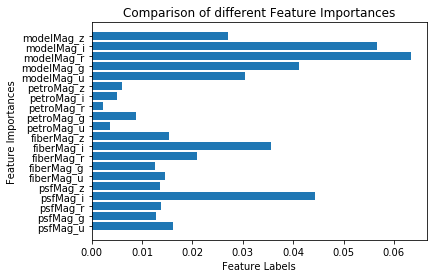

In [200]:
import matplotlib.pyplot as plt

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.barh(X.columns, std) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [211]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 21 columns):
type          199991 non-null object
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
dtypes: float64(20), object(1)
memory usage: 33.6+ MB


## 최고 성능의 알고리즘 찾기

In [27]:
from sklearn.model_selection import train_test_split

XX_train, XX_test, yy_train, yy_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2) 

XX_train.shape, XX_test.shape, yy_train.shape, yy_test.shape

((159992, 20), (39999, 20), (159992,), (39999,))

In [25]:
from sklearn.utils.testing import all_estimators
from sklearn.metrics import accuracy_score

# classifier 알고리즘 모두 추출하기--- (*1)
allAlgorithms = all_estimators(type_filter="classifier")

print(allAlgorithms)    
print(len(allAlgorithms))   # 31
print(type(allAlgorithms))  # list

C:\Users\jieun\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\jieun\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


[('AdaBoostClassifier', <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>), ('BaggingClassifier', <class 'sklearn.ensemble.bagging.BaggingClassifier'>), ('BernoulliNB', <class 'sklearn.naive_bayes.BernoulliNB'>), ('CalibratedClassifierCV', <class 'sklearn.calibration.CalibratedClassifierCV'>), ('ComplementNB', <class 'sklearn.naive_bayes.ComplementNB'>), ('DecisionTreeClassifier', <class 'sklearn.tree.tree.DecisionTreeClassifier'>), ('ExtraTreeClassifier', <class 'sklearn.tree.tree.ExtraTreeClassifier'>), ('ExtraTreesClassifier', <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>), ('GaussianNB', <class 'sklearn.naive_bayes.GaussianNB'>), ('GaussianProcessClassifier', <class 'sklearn.gaussian_process.gpc.GaussianProcessClassifier'>), ('GradientBoostingClassifier', <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>), ('KNeighborsClassifier', <class 'sklearn.neighbors.classification.KNeighborsClassifier'>), ('LabelPropagation', <class 'sklearn.semi_su

In [29]:
for(name, algorithm) in allAlgorithms:
    # 각 알고리즘 객체 생성하기 --- (*2)
    clf = algorithm()

    # 학습하고 평가하기 --- (*3)
    clf.fit(XX_train, yy_train)
    yy_pred = clf.predict(XX_test)
    print(name,"의 정답률 = " , accuracy_score(yy_test, yy_pred))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier 의 정답률 =  0.2666066651666292


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

BaggingClassifier 의 정답률 =  0.32063301582539566


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

BernoulliNB 의 정답률 =  0.248931223280582


C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarni

CalibratedClassifierCV(base_estimator=None, cv='warn', method='sigmoid')

CalibratedClassifierCV 의 정답률 =  0.24903122578064452


ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

ComplementNB 의 정답률 =  0.470436760919023


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier 의 정답률 =  0.29130728268206707


ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random')

ExtraTreeClassifier 의 정답률 =  0.7951448786219656


C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

ExtraTreesClassifier 의 정답률 =  0.8602715067876697


GaussianNB(priors=None, var_smoothing=1e-09)

GaussianNB 의 정답률 =  0.27820695517387933


MemoryError: 

In [255]:
from sklearn.model_selection import train_test_split

XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, 
                                                    test_size=0.2) 

XX_train.shape, XX_test.shape, yy_train.shape, yy_test.shape

((159992, 20), (39999, 20), (159992,), (39999,))

In [256]:
from sklearn.utils.testing import all_estimators
from sklearn.metrics import accuracy_score

# classifier 알고리즘 모두 추출하기--- (*1)
allAlgorithms = all_estimators(type_filter="classifier")

print(allAlgorithms)    
print(len(allAlgorithms))   # 31
print(type(allAlgorithms))  # list

[('AdaBoostClassifier', <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>), ('BaggingClassifier', <class 'sklearn.ensemble.bagging.BaggingClassifier'>), ('BernoulliNB', <class 'sklearn.naive_bayes.BernoulliNB'>), ('CalibratedClassifierCV', <class 'sklearn.calibration.CalibratedClassifierCV'>), ('ComplementNB', <class 'sklearn.naive_bayes.ComplementNB'>), ('DecisionTreeClassifier', <class 'sklearn.tree.tree.DecisionTreeClassifier'>), ('ExtraTreeClassifier', <class 'sklearn.tree.tree.ExtraTreeClassifier'>), ('ExtraTreesClassifier', <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>), ('GaussianNB', <class 'sklearn.naive_bayes.GaussianNB'>), ('GaussianProcessClassifier', <class 'sklearn.gaussian_process.gpc.GaussianProcessClassifier'>), ('GradientBoostingClassifier', <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>), ('KNeighborsClassifier', <class 'sklearn.neighbors.classification.KNeighborsClassifier'>), ('LabelPropagation', <class 'sklearn.semi_su

In [257]:
for(name, algorithm) in allAlgorithms:
    # 각 알고리즘 객체 생성하기 --- (*2)
    clf = algorithm()

    # 학습하고 평가하기 --- (*3)
    clf.fit(XX_train, yy_train)
    yy_pred = clf.predict(XX_test)
    print(name,"의 정답률 = " , accuracy_score(yy_test, yy_pred))

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

AdaBoostClassifier 의 정답률 =  0.4150103752593815


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

BaggingClassifier 의 정답률 =  0.8568964224105603


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

BernoulliNB 의 정답률 =  0.24825620640516013


C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packa

C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
C:\Users\jieun\Anaconda3\lib\site-packages\sklearn\calibration.py:457: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)


CalibratedClassifierCV(base_estimator=None, cv='warn', method='sigmoid')

CalibratedClassifierCV 의 정답률 =  0.24818120453011325


ValueError: Input X must be non-negative